In [349]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from scipy.stats import ttest_ind_from_stats, ttest_ind
from math import floor
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
from matplotlib.gridspec import GridSpec
import pandas as pd
from matplotlib.ticker import FuncFormatter

## SP calculation min / max

In [2]:
uncerts = []
errs = []

for sens_attr in ["race", "sex", "sex_race"]:
    for dataset in ["adult", "compas", "german"]:
        for mechanism in ["laplace", "exp"]:
            print(f"{dataset}-{sens_attr}-{mechanism}_errs")
            print(f"{dataset}-{sens_attr}-{mechanism}_uncert")
            
            with open(f"resultatenarrayspafer/{dataset}-{sens_attr}-{mechanism}_uncert", 'rb') as f:
                uncerts.append(np.load(f))
                
            with open(f"resultatenarrayspafer/{dataset}-{sens_attr}-{mechanism}_errs", 'rb') as f:
                errs.append(np.load(f))
                
                

# with open("resultatenarrayspafer/compas-race-exp_uncert", 'rb') as f:
#     compas_race_exp_uncert = uncerts.append(np.load(f))

adult-race-laplace_errs
adult-race-laplace_uncert
adult-race-exp_errs
adult-race-exp_uncert
compas-race-laplace_errs
compas-race-laplace_uncert
compas-race-exp_errs
compas-race-exp_uncert
german-race-laplace_errs
german-race-laplace_uncert
german-race-exp_errs
german-race-exp_uncert
adult-sex-laplace_errs
adult-sex-laplace_uncert
adult-sex-exp_errs
adult-sex-exp_uncert
compas-sex-laplace_errs
compas-sex-laplace_uncert
compas-sex-exp_errs
compas-sex-exp_uncert
german-sex-laplace_errs
german-sex-laplace_uncert
german-sex-exp_errs
german-sex-exp_uncert
adult-sex_race-laplace_errs
adult-sex_race-laplace_uncert
adult-sex_race-exp_errs
adult-sex_race-exp_uncert
compas-sex_race-laplace_errs
compas-sex_race-laplace_uncert
compas-sex_race-exp_errs
compas-sex_race-exp_uncert
german-sex_race-laplace_errs
german-sex_race-laplace_uncert
german-sex_race-exp_errs
german-sex_race-exp_uncert


In [3]:
len(errs)

18

In [4]:
stds = [uncert * np.sqrt(50) for uncert in uncerts]
idxs = [0, 2, 4, 6, 8, 10, 12, 14, 16]
laplace_intervals = []
exp_intervals = []

for i in idxs:
    laplace_interval = []
    exp_interval = []
    laplace_flag = False
    exp_flag = False
    for j, epsilon in enumerate(np.linspace(0.01, 0.5, 40)):
        tstat, pval = ttest_ind_from_stats(errs[i][j], stds[i][j], 50, errs[i+1][j], stds[i+1][j], 50, alternative='less') 
        if pval < 0.05:
            if laplace_flag == False:
                laplace_interval.append([])
            laplace_flag = True
            laplace_interval[-1].append(epsilon)
            # print(f"For epsilon={epsilon}, Laplacian was better than Exponential (t={tstat})")
            
        elif pval > 0.95:
            if exp_flag == False:
                exp_interval.append([])
            exp_flag = True
            exp_interval[-1].append(epsilon)
            # print(f"For epsilon={epsilon}, Exponential was better than Laplacian (t={tstat})")
            
        else:
            if laplace_flag:
                laplace_flag = False
                
            if exp_flag:
                exp_flag = False

    laplace_intervals.append(laplace_interval)
    exp_intervals.append(exp_interval)

print(len(exp_intervals))

9


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


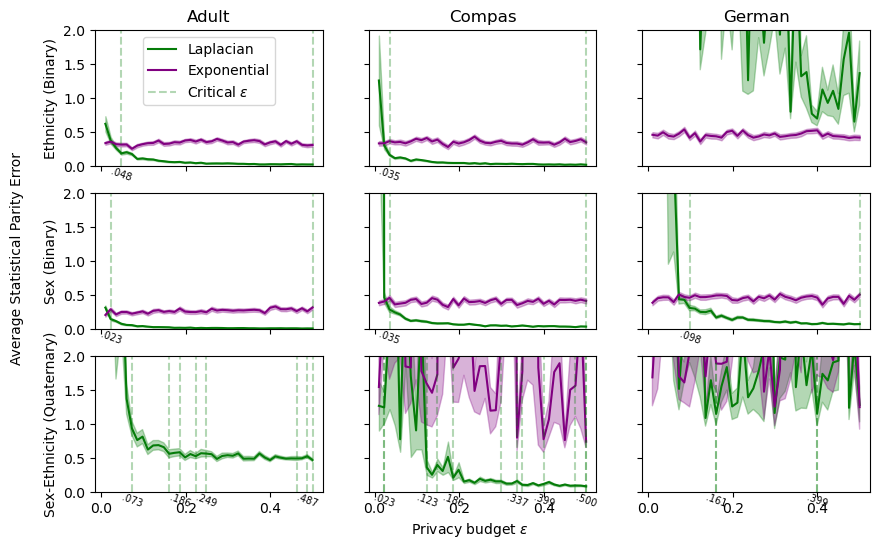

In [106]:
# Create a figure with 6 subplots in a 2x3 grid
fig, axs = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(10, 6))
epsilons = np.linspace(0.01, 0.5, 40)

for ax, i in enumerate([0, 2, 4, 6, 8, 10, 12, 14, 16]):
    axs.flat[ax].plot(epsilons, errs[i], color='#057c09', label="Laplacian")
    axs.flat[ax].fill_between(epsilons, errs[i] + uncerts[i], errs[i] - uncerts[i], alpha=0.3, color='#057c09')
    axs.flat[ax].plot(epsilons, errs[i+1], color='purple', label="Exponential")
    axs.flat[ax].fill_between(epsilons, errs[i+1] + uncerts[i+1], errs[i+1] - uncerts[i+1], alpha=0.3, color='purple')
    axs.flat[ax].set_ylim(0, 2)

for ax, (laplace_interval, exp_interval) in enumerate(zip(laplace_intervals, exp_intervals)):
    for interval in laplace_interval:
        axs.flat[ax].axvline(interval[0], alpha=0.3, linestyle='--', color='#057c09', label="Critical $\epsilon$")
        axs.flat[ax].axvline(interval[-1], alpha=0.3, linestyle='--', color='#057c09')
        axs.flat[ax].text(interval[0], 0, f"{interval[0]:.3f}"[1:], transform=axs.flat[ax].get_xaxis_transform(),
            ha='center', va='top', rotation=340, fontsize=7)
    
axs.flat[0].set_title("Adult")
axs.flat[1].set_title("Compas")
axs.flat[2].set_title("German")
axs.flat[0].set_ylabel("Ethnicity (Binary)")
axs.flat[3].set_ylabel("Sex (Binary)")
axs.flat[6].set_ylabel("Sex-Ethnicity (Quaternary)")
axs.flat[0].legend()
    
# Set common labels for x and y axes
fig.text(0.5, 0.04, 'Privacy budget $\epsilon$', ha='center')
fig.text(0.04, 0.5, 'Average Statistical Parity Error', va='center', rotation='vertical')

# Show the plot
plt.savefig("rsq0-intersectional.eps", dpi=800)
plt.show()

## Different SP calculation unpriv / priv

In [9]:
uncerts = []
errs = []

for sens_attr in ["race", "sex"]:
    for dataset in ["adult", "compas", "german"]:
        for mechanism in ["laplace", "exp"]:
            print(f"{dataset}-{sens_attr}-{mechanism}_errs")
            print(f"{dataset}-{sens_attr}-{mechanism}_uncert")
            
            with open(f"resultatenarrayspafernewsp/{dataset}-{sens_attr}-{mechanism}_uncert", 'rb') as f:
                uncerts.append(np.load(f))
                
            with open(f"resultatenarrayspafernewsp/{dataset}-{sens_attr}-{mechanism}_errs", 'rb') as f:
                errs.append(np.load(f))
                
                

# with open("resultatenarrayspafer/compas-race-exp_uncert", 'rb') as f:
#     compas_race_exp_uncert = uncerts.append(np.load(f))

adult-race-laplace_errs
adult-race-laplace_uncert
adult-race-exp_errs
adult-race-exp_uncert
compas-race-laplace_errs
compas-race-laplace_uncert
compas-race-exp_errs
compas-race-exp_uncert
german-race-laplace_errs
german-race-laplace_uncert
german-race-exp_errs
german-race-exp_uncert
adult-sex-laplace_errs
adult-sex-laplace_uncert
adult-sex-exp_errs
adult-sex-exp_uncert
compas-sex-laplace_errs
compas-sex-laplace_uncert
compas-sex-exp_errs
compas-sex-exp_uncert
german-sex-laplace_errs
german-sex-laplace_uncert
german-sex-exp_errs
german-sex-exp_uncert


In [10]:
stds = [uncert * np.sqrt(50) for uncert in uncerts]
idxs = [0, 2, 4, 6, 8, 10]
laplace_intervals = []
exp_intervals = []

for i in idxs:
    laplace_interval = []
    exp_interval = []
    laplace_flag = False
    exp_flag = False
    for j, epsilon in enumerate(np.linspace(0.01, 0.5, 40)):
        tstat, pval = ttest_ind_from_stats(errs[i][j], stds[i][j], 50, errs[i+1][j], stds[i+1][j], 50, alternative='less') 
        if pval < 0.05:
            if laplace_flag == False:
                laplace_interval.append([])
            laplace_flag = True
            laplace_interval[-1].append(epsilon)
            # print(f"For epsilon={epsilon}, Laplacian was better than Exponential (t={tstat})")
            
        elif pval > 0.95:
            if exp_flag == False:
                exp_interval.append([])
            exp_flag = True
            exp_interval[-1].append(epsilon)
            # print(f"For epsilon={epsilon}, Exponential was better than Laplacian (t={tstat})")
            
        else:
            if laplace_flag:
                laplace_flag = False
                
            if exp_flag:
                exp_flag = False

    laplace_intervals.append(laplace_interval)
    exp_intervals.append(exp_interval)

print(len(exp_intervals))

6


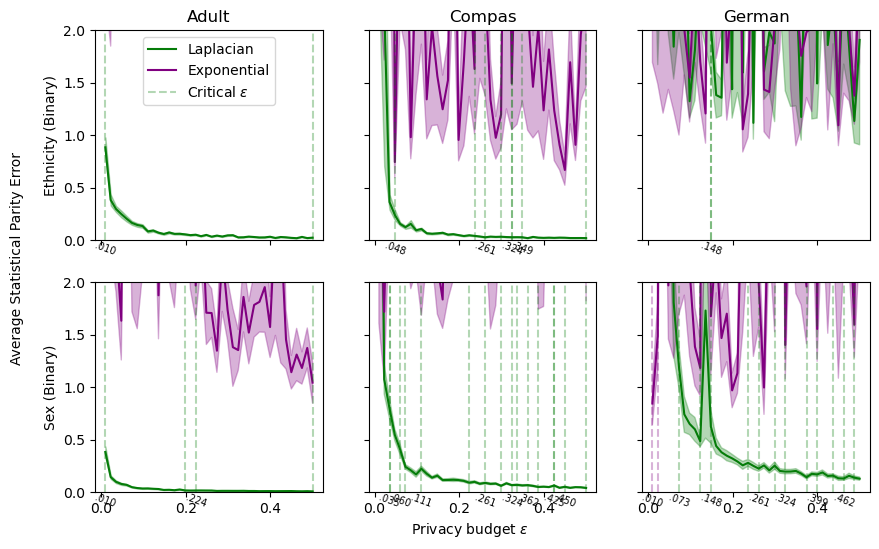

In [19]:
# Create a figure with 6 subplots in a 2x3 grid
fig, axs = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(10, 6))
epsilons = np.linspace(0.01, 0.5, 40)

for ax, i in enumerate([0, 2, 4, 6, 8, 10]):
    axs.flat[ax].plot(epsilons, errs[i], color='#057c09', label="Laplacian")
    axs.flat[ax].fill_between(epsilons, errs[i] + uncerts[i], errs[i] - uncerts[i], alpha=0.3, color='#057c09')
    axs.flat[ax].plot(epsilons, errs[i+1], color='purple', label="Exponential")
    axs.flat[ax].fill_between(epsilons, errs[i+1] + uncerts[i+1], errs[i+1] - uncerts[i+1], alpha=0.3, color='purple')
    axs.flat[ax].set_ylim(0, 2)

for ax, (laplace_interval, exp_interval) in enumerate(zip(laplace_intervals, exp_intervals)):
    for interval in laplace_interval:
        axs.flat[ax].axvline(interval[0], alpha=0.3, linestyle='--', color='#057c09', label="Critical $\epsilon$")
        axs.flat[ax].axvline(interval[-1], alpha=0.3, linestyle='--', color='#057c09')
        axs.flat[ax].text(interval[0], 0, f"{interval[0]:.3f}"[1:], transform=axs.flat[ax].get_xaxis_transform(),
            ha='center', va='top', rotation=340, fontsize=7)
        
    for interval in exp_interval:  
        axs.flat[ax].axvline(interval[0], alpha=0.3, linestyle='--', color='purple', label="Critical $\epsilon$")
        axs.flat[ax].axvline(interval[-1], alpha=0.3, linestyle='--', color='purple')
        axs.flat[ax].text(interval[0], 0, f"{interval[0]:.3f}"[1:], transform=axs.flat[ax].get_xaxis_transform(),
            ha='center', va='top', rotation=340, fontsize=7)
        
        
    
axs.flat[0].set_title("Adult")
axs.flat[1].set_title("Compas")
axs.flat[2].set_title("German")
axs.flat[0].set_ylabel("Ethnicity (Binary)")
axs.flat[3].set_ylabel("Sex (Binary)")
axs.flat[0].legend()
    
# Set common labels for x and y axes
fig.text(0.5, 0.04, 'Privacy budget $\epsilon$', ha='center')
fig.text(0.04, 0.5, 'Average Statistical Parity Error', va='center', rotation='vertical')

# Show the plot
plt.savefig("rsq0-newsp.png", dpi=800)
plt.show()

In [252]:
uncerts = []
errs = []
inv_ratios = []

for sens_attr in ["race", "sex", "sex_race"]:
    for dataset in ["adult", "compas", "german"]:
        for mechanism in ["laplace", "exp"]:
            print(f"{dataset}-{sens_attr}-{mechanism}_errs")
            print(f"{dataset}-{sens_attr}-{mechanism}_uncert")
            
            with open(f"resultsrsq0withinvalids/{dataset}-{sens_attr}-{mechanism}_uncert", 'rb') as f:
                uncerts.append(np.load(f))
                
            with open(f"resultsrsq0withinvalids/{dataset}-{sens_attr}-{mechanism}_errs", 'rb') as f:
                errs.append(np.load(f))
                
        with open(f"resultsrsq0withinvalids/{dataset}-{sens_attr}-laplace_inv_ratio", 'rb') as f:
            inv_ratios.append(np.load(f))
                
with open("resultsrsq0withinvalids/adult-race-laplace_inv_ratio", 'rb') as f:
    adult_race_laplace_inv_ratio = np.load(f)

with open("resultsrsq0withinvalids/adult-sex-laplace_inv_ratio", 'rb') as f:
    adult_sex_laplace_inv_ratio = np.load(f)

with open("resultsrsq0withinvalids/adult-sex_race-laplace_inv_ratio", 'rb') as f:
    adult_sex_race_laplace_inv_ratio = np.load(f)

with open("resultsrsq0withinvalids/german-sex-laplace_inv_ratio", 'rb') as f:
    german_sex_laplace_inv_ratio = np.load(f)

with open("resultsrsq0withinvalids/german-race-laplace_inv_ratio", 'rb') as f:
    german_race_laplace_inv_ratio = np.load(f)
    
with open("resultsrsq0withinvalids/german-sex_race-laplace_inv_ratio", 'rb') as f:
    german_sex_race_laplace_inv_ratio = np.load(f)
    
with open("resultsrsq0withinvalids/compas-sex-laplace_inv_ratio", 'rb') as f:
    compas_sex_laplace_inv_ratio = np.load(f)
    
with open("resultsrsq0withinvalids/compas-race-laplace_inv_ratio", 'rb') as f:
    compas_race_laplace_inv_ratio = np.load(f)

with open("resultsrsq0withinvalids/compas-sex_race-laplace_inv_ratio", 'rb') as f:
    compas_sex_race_laplace_inv_ratio = np.load(f)

adult-race-laplace_errs
adult-race-laplace_uncert
adult-race-exp_errs
adult-race-exp_uncert
compas-race-laplace_errs
compas-race-laplace_uncert
compas-race-exp_errs
compas-race-exp_uncert
german-race-laplace_errs
german-race-laplace_uncert
german-race-exp_errs
german-race-exp_uncert
adult-sex-laplace_errs
adult-sex-laplace_uncert
adult-sex-exp_errs
adult-sex-exp_uncert
compas-sex-laplace_errs
compas-sex-laplace_uncert
compas-sex-exp_errs
compas-sex-exp_uncert
german-sex-laplace_errs
german-sex-laplace_uncert
german-sex-exp_errs
german-sex-exp_uncert
adult-sex_race-laplace_errs
adult-sex_race-laplace_uncert
adult-sex_race-exp_errs
adult-sex_race-exp_uncert
compas-sex_race-laplace_errs
compas-sex_race-laplace_uncert
compas-sex_race-exp_errs
compas-sex_race-exp_uncert
german-sex_race-laplace_errs
german-sex_race-laplace_uncert
german-sex_race-exp_errs
german-sex_race-exp_uncert


In [253]:
stds = [uncert * np.sqrt(50) for uncert in uncerts]
idxs = [0, 2, 4, 6, 8, 10, 12, 14, 16]
laplace_intervals = []
exp_intervals = []

for i in idxs:
    laplace_interval = []
    exp_interval = []
    laplace_flag = False
    exp_flag = False
    for j, epsilon in enumerate(np.linspace(0.01, 0.5, 40)):
        tstat, pval = ttest_ind_from_stats(errs[i][j], stds[i][j], 50, errs[i+1][j], stds[i+1][j], 50, alternative='less') 
        if pval < 0.05:
            if not laplace_flag:
                laplace_interval.append([])
            laplace_flag = True
            laplace_interval[-1].append(epsilon)
            # print(f"For epsilon={epsilon}, Laplacian was better than Exponential (t={tstat})")
            
        elif pval > 0.95:
            if not exp_flag:
                exp_interval.append([])
            exp_flag = True
            exp_interval[-1].append(epsilon)
            # print(f"For epsilon={epsilon}, Exponential was better than Laplacian (t={tstat})")
            
        else:
            if laplace_flag:
                laplace_flag = False
                
            if exp_flag:
                exp_flag = False

    laplace_intervals.append(laplace_interval)
    exp_intervals.append(exp_interval)


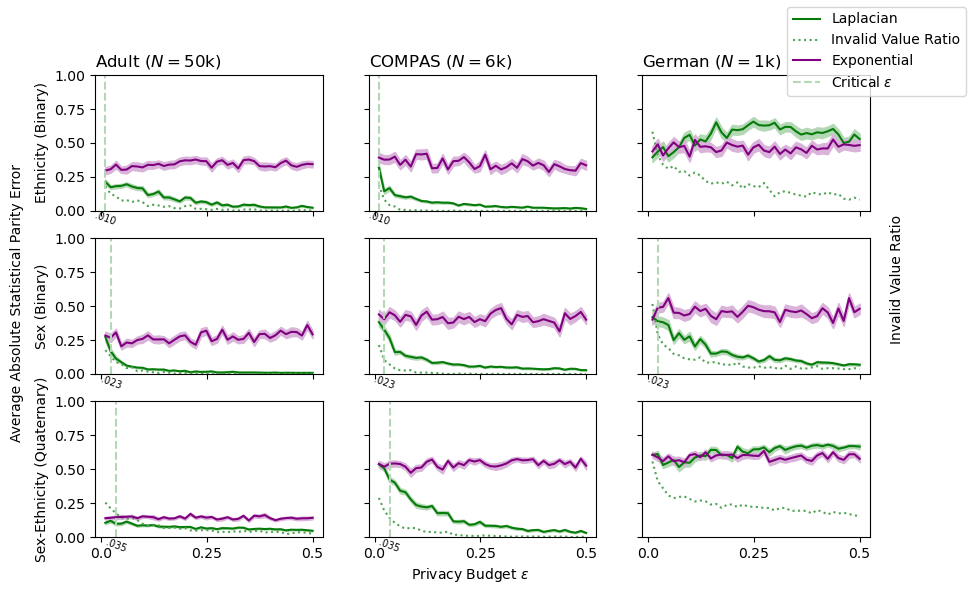

In [254]:
# Create a figure with 6 subplots in a 2x3 grid
fig, axs = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(10, 6))
epsilons = np.linspace(0.01, 0.5, 40)

for ax, i in enumerate([0, 2, 4, 6, 8, 10, 12, 14, 16]):
    axs.flat[ax].plot(epsilons, errs[i], color='#057c09', label="Laplacian")
    axs.flat[ax].fill_between(epsilons, errs[i] + uncerts[i], errs[i] - uncerts[i], color='#b4d8b5')
    axs.flat[ax].plot(epsilons, inv_ratios[ax], linestyle=":", color='#50a353', label="Invalid Value Ratio")
    axs.flat[ax].plot(epsilons, errs[i+1], color='purple', label="Exponential")
    axs.flat[ax].fill_between(epsilons, errs[i+1] + uncerts[i+1], errs[i+1] - uncerts[i+1], color='#d9b3d9')
    axs.flat[ax].set_ylim(0, 1)
    axs.flat[ax].set_xticks([0.0, 0.25, 0.5])
    axs.flat[ax].set_xticklabels(['0.0', '0.25', '0.5'])
    # axs.flat[ax].xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

for ax, (laplace_interval, exp_interval) in enumerate(zip(laplace_intervals, exp_intervals)):
    for interval in laplace_interval[-1:]:
        if 0.5 in interval:
            axs.flat[ax].axvline(interval[0], linestyle='--', color='#b4d8b5', label="Critical $\epsilon$")
            axs.flat[ax].text(interval[0], 0, f"{interval[0]:.3f}"[1:], transform=axs.flat[ax].get_xaxis_transform(),
                ha='center', va='top', rotation=340, fontsize=7)
    
axs.flat[0].set_title("Adult ($N=$50k)", loc='left')
axs.flat[1].set_title("COMPAS ($N=$6k)", loc='left')
axs.flat[2].set_title("German ($N=$1k)", loc='left')
axs.flat[0].set_ylabel("Ethnicity (Binary)")
axs.flat[3].set_ylabel("Sex (Binary)")
axs.flat[6].set_ylabel("Sex-Ethnicity (Quaternary)")

def legend_without_duplicate_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    return unique
    
fig.legend(*zip(*legend_without_duplicate_labels(axs.flat[0])))
    
# Set common labels for x and y axes
fig.text(0.5, 0.04, 'Privacy Budget $\epsilon$', ha='center')
fig.text(0.04, 0.5, 'Average Absolute Statistical Parity Error', va='center', rotation='vertical')
fig.text(0.92, 0.54, 'Invalid Value Ratio', va='center', rotation='vertical')

# Show the plot
plt.savefig("rsq0-intersectional-invalids.png", dpi=400)
plt.show()

In [242]:
print("For adult race combination:")
print(f"error for eps=0.5 and Laplacian mechanism is: {errs[0][-1]}")
print(f"error for eps=0.5 and Exponential mechanism is: {errs[1][-1]}")
print(f"invalid ratio for eps=0.5 is: {adult_race_laplace_inv_ratio[-1]}")

For adult race combination:
error for eps=0.5 and Laplacian mechanism is: 0.023195737847414053
error for eps=0.5 and Exponential mechanism is: 0.3434978204048131
invalid ratio for eps=0.5 is: 0.0025


In [179]:
uncerts = []
errs = []
eighty_percents = []
estimated_sps = []
tree_sps = []

for sens_attr in ["race", "sex", "sex_race"]:
    for dataset in ["compas", "adult"]:
        with open(f"resultsrsq1withinvalids/{dataset}-{sens_attr}-uncerts", 'rb') as f:
            uncerts.append(np.load(f))
                
        with open(f"resultsrsq1withinvalids/{dataset}-{sens_attr}-errs", 'rb') as f:
            errs.append(np.load(f))
            
        with open(f"resultsrsq1withinvalids/{dataset}-{sens_attr}-eighty_percents", 'rb') as f:
            eighty_percents.append(np.load(f))
        
        with open(f"resultsrsq1withinvalids/{dataset}-{sens_attr}-estimated_sps", 'rb') as f:
            estimated_sps.append(np.load(f))
            
        with open(f"resultsrsq1withinvalids/{dataset}-{sens_attr}-tree_sps", 'rb') as f:
            tree_sps.append(np.load(f))
            

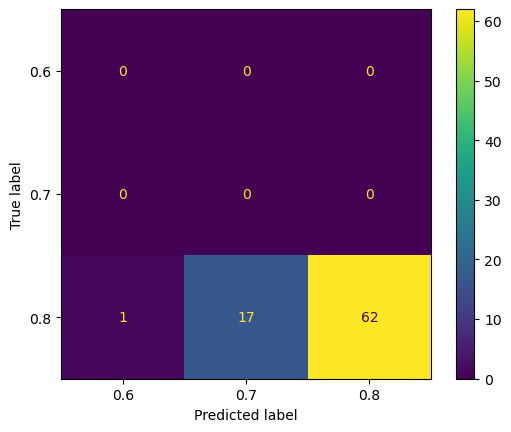

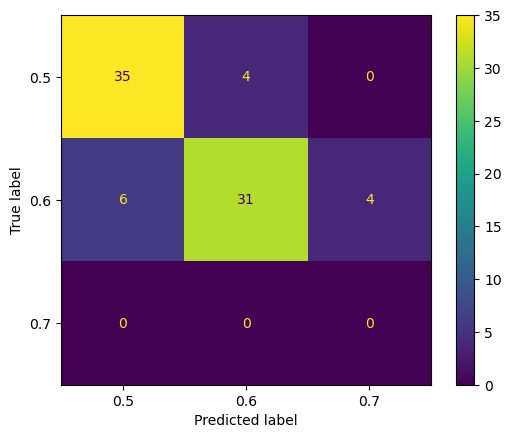

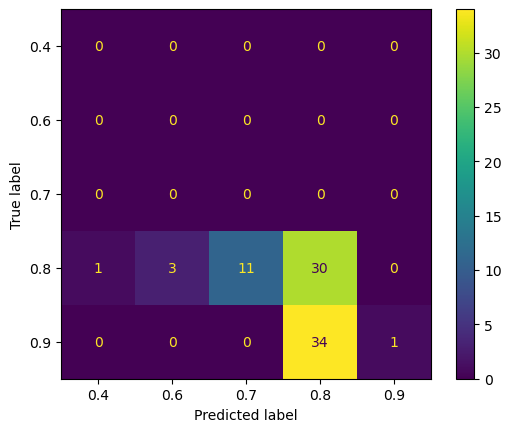

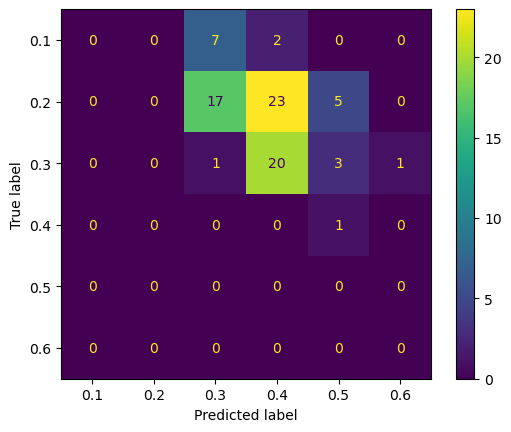

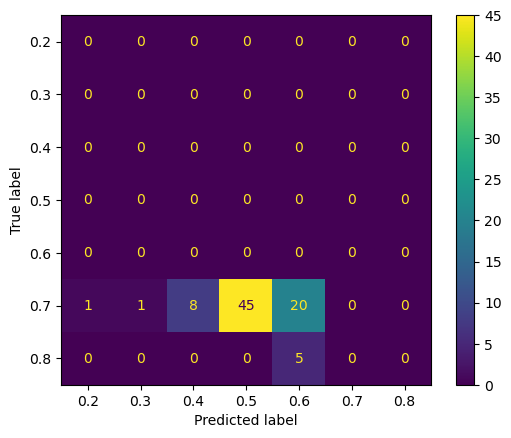

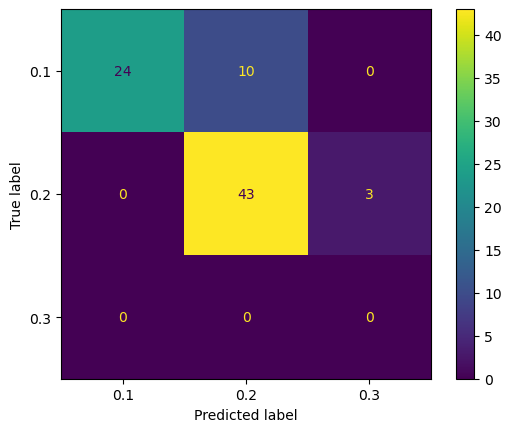

In [181]:
unweighted_avg_recalls = []
bin_tree_sps, bin_estimated_sps = [], []
for tree_sp, estimated_sp in zip(tree_sps, estimated_sps):
    unweighted_avg_recall = []
    bin_tree_sp, bin_estimated_sp = [], []
    for t_sp, e_sp in zip(tree_sp, estimated_sp):
        bin_tree_sp.append(f'{floor(np.mean(t_sp) * 10) / 10.0}')
        bin_estimated_sp.append(f'{floor(np.mean(e_sp) * 10) / 10.0}')
        bin_t_sp = [f'{floor(t * 10) / 10.0}' for t in t_sp]
        bin_e_sp = [f'{floor(e * 10) / 10.0}' for e in e_sp]
        labels = sorted(list(set(np.unique(bin_t_sp)) | set(np.unique(bin_e_sp))))
        cm = confusion_matrix(bin_t_sp, bin_e_sp, labels=labels)
        unweighted_avg_recall.append(sum([(cm[idx, idx] / np.sum(cm[idx])) / len(labels) for idx, label in enumerate(labels) if np.sum(cm[idx]) > 0]))
        
    unweighted_avg_recalls.append(unweighted_avg_recall)
    bin_tree_sps.append(bin_tree_sp)
    bin_estimated_sps.append(bin_estimated_sp)
    
    labels = sorted(list(set(np.unique(bin_tree_sp)) | set(np.unique(bin_estimated_sp))))
    cm = confusion_matrix(bin_tree_sp, bin_estimated_sp, labels=labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot()
    plt.show()
    

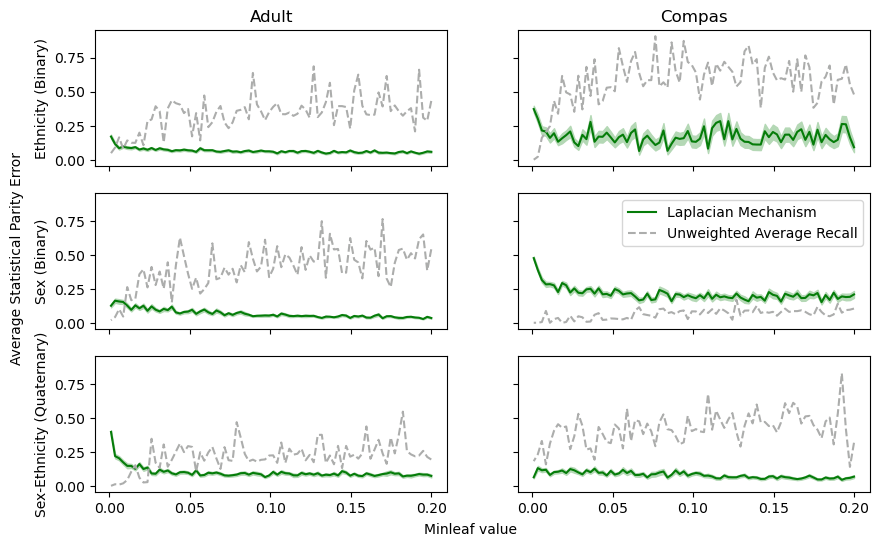

In [186]:
# Create a figure with 6 subplots in a 3x2 grid
fig, axs = plt.subplots(3, 2, sharex=True, sharey=True, figsize=(10, 6))
minleafs = np.linspace(0.2, 0.001, 80)
        
for ax, err, uncert, recall in zip([0, 2, 4, 1, 3, 5], errs, uncerts, unweighted_avg_recalls):
    axs.flat[ax].plot(minleafs, err, label="Laplacian Mechanism", color="#057c09")
    axs.flat[ax].fill_between(minleafs, err + uncert, err - uncert, color="#b4d8b5")
    axs.flat[ax].plot(minleafs, recall, label="Unweighted Average Recall", linestyle="--", color="#ACADAC")
    # axs.flat[ax].set_yticks([0.1, 0.2, 0.3, 0.4])
    
axs.flat[0].set_title("Adult")
axs.flat[1].set_title("Compas")
axs.flat[0].set_ylabel("Ethnicity (Binary)")
axs.flat[2].set_ylabel("Sex (Binary)")
axs.flat[4].set_ylabel("Sex-Ethnicity (Quaternary)")
axs.flat[3].legend()
    
# Set common labels for x and y axes
fig.text(0.5, 0.04, 'Minleaf value', ha='center')
fig.text(0.04, 0.5, 'Average Statistical Parity Error', va='center', rotation='vertical')

# Show the plot
plt.savefig("rsq1-intersectional-invalids.png", dpi=800)
plt.show()

In [317]:
estimated_sps = []
tree_sps = []

for sens_attr in ["race", "sex", "sex_race"]:
    for dataset in ["adult", "compas"]:
        with open(f"resultsrsq1multipleepsilon/{dataset}-{sens_attr}-estimated_sps", 'rb') as f:
            estimated_sps.append(np.load(f))
            
        with open(f"resultsrsq1multipleepsilon/{dataset}-{sens_attr}-tree_sps", 'rb') as f:
            tree_sps.append(np.load(f))
            
estimated_sps = np.array(estimated_sps)
tree_sps = np.array(tree_sps)
print(f"error for minleaf = 0.2: {np.mean(np.abs(estimated_sps[0].T - tree_sps[0].T), axis=1)[:,0]}")

error for minleaf = 0.2: [0.09388913 0.05720547 0.02439022 0.01694262 0.01440183]


[0.09388913 0.05720547 0.02439022 0.01694262 0.01440183]
--------
[0.08281139 0.05323495 0.04072619 0.03230725 0.01941722]
--------
[0.11848039 0.12511094 0.16309174 0.23693336 0.15825918]
--------
[0.14380051 0.08486777 0.0696232  0.03514891 0.03499263]
--------
[0.07088889 0.06092343 0.04381066 0.02952955 0.02197433]
--------
[0.40177707 0.18280057 0.10861139 0.07794546 0.06698066]
--------


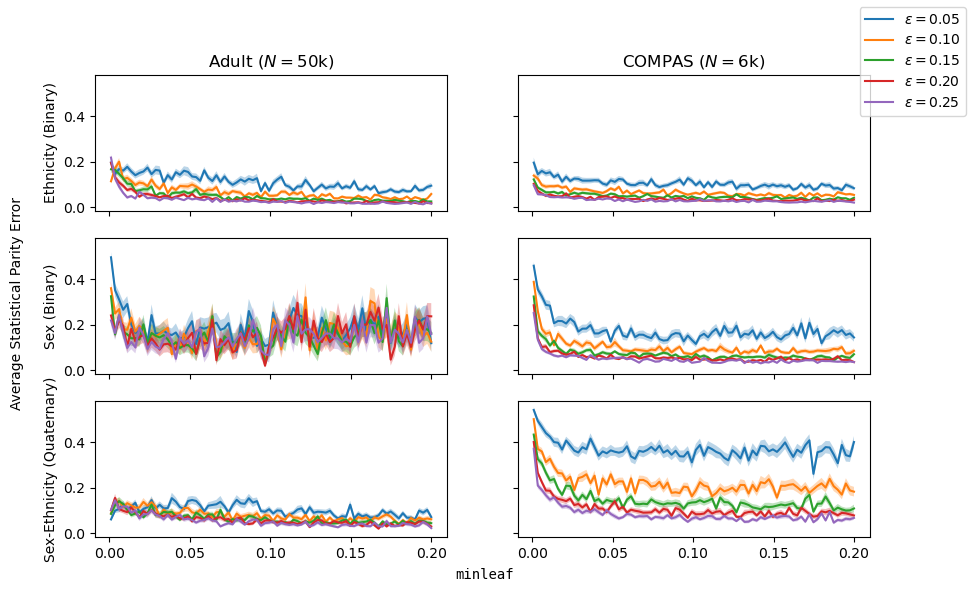

In [319]:
# Create a figure with 6 subplots in a 3x2 grid
fig, axs = plt.subplots(3, 2, sharex=True, sharey=True, figsize=(10, 6))
minleafs = np.linspace(0.2, 0.001, 80)
epsilons = ['0.05', '0.10', '0.15', '0.20', '0.25']


for ax, e_sp_combi, t_sp_combi in zip([0, 1, 2, 3, 4, 5], estimated_sps, tree_sps):    
    errs = []
    uncerts = []
    for e_minleaf, t_minleaf in zip(e_sp_combi, t_sp_combi):
        # define mean abs err for every epsilon
        errs.append(np.mean(np.abs(e_minleaf.T - t_minleaf.T), axis=1))
        
        # define err uncertainty for every epsilon
        uncerts.append(np.std(np.abs(e_minleaf.T - t_minleaf.T), axis=1) / np.sqrt(50))
            
    errs = np.array(errs)
    uncerts = np.array(uncerts)
    
    print(errs.T[:,0])
    print('--------')
    
    for err, uncert, eps in zip(errs.T, uncerts.T, epsilons):
        axs.flat[ax].plot(minleafs, err, label=f"$\epsilon = {eps}$")
        axs.flat[ax].fill_between(minleafs, err + uncert, err - uncert, alpha=0.3)

axs.flat[0].set_title("Adult ($N=$50k)")
axs.flat[1].set_title("COMPAS ($N=$6k)")
axs.flat[0].set_ylabel("Ethnicity (Binary)")
axs.flat[2].set_ylabel("Sex (Binary)")
axs.flat[4].set_ylabel("Sex-Ethnicity (Quaternary)")

def legend_without_duplicate_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    return unique
    
fig.legend(*zip(*legend_without_duplicate_labels(axs.flat[0])))
    
# Set common labels for x and y axes
hfont = {'fontname':'monospace'}
fig.text(0.515, 0.04, 'minleaf', **hfont, ha='center')
fig.text(0.04, 0.5, 'Average Statistical Parity Error', va='center', rotation='vertical')
plt.savefig("rsq1withmultipleepsilon.png", dpi=400)
plt.show()

In [335]:
estimated_sps = []
tree_sps = []

for sens_attr in ["race", "sex", "sex_race"]:
    for dataset in ["compas", "adult"]:
        with open(f"resultsrsq1multipleepsilon/{dataset}-{sens_attr}-estimated_sps", 'rb') as f:
            estimated_sps.append(np.load(f))
            
        with open(f"resultsrsq1multipleepsilon/{dataset}-{sens_attr}-tree_sps", 'rb') as f:
            tree_sps.append(np.load(f))
            
estimated_sps = np.array(estimated_sps)
tree_sps = np.array(tree_sps)

In [342]:
random_sps = np.random.rand(*estimated_sps.shape)
random_sps
epsilons = np.array(['0.05', '0.1', '0.15', '0.2', '0.25'])

for e_sp_combi, t_sp_combi, r_sp_combi, name in zip(estimated_sps, tree_sps, random_sps, ["race-compas", "race-adult", "sex-compas", "sex-adult", "sex_race-compas", "sex_race-adult"]):
    errs_rand = []
    errs_pafer = []
    stds_pafer = []
    stds_rand = []
    
    for i, (e_minleaf, t_minleaf, r_minleaf) in enumerate(zip(e_sp_combi, t_sp_combi, r_sp_combi)):
        errs_pafer.append(np.mean(np.abs(e_minleaf.T - t_minleaf.T), axis=1))
        errs_rand.append(np.mean(np.abs(r_minleaf.T - t_minleaf.T), axis=1))
        stds_pafer.append(np.std(np.abs(e_minleaf.T - t_minleaf.T), axis=1))
        stds_rand.append(np.std(np.abs(r_minleaf.T - t_minleaf.T), axis=1))

        
    errs_rand = np.array(errs_rand)
    errs_pafer = np.array(errs_pafer)
    stds_pafer = np.array(stds_pafer)
    stds_rand = np.array(stds_rand)
    errs_perfect = np.zeros(errs_rand.shape)
    stds_perfect = np.zeros(stds_rand.shape)
    
    print(f"comparison of minleaf = {minleafs[-1]}")
    t_0001_rand, p_0001_rand = ttest_ind_from_stats(mean1=errs_rand.T[:,-1], std1=stds_rand.T[:,-1], nobs1=50, mean2=errs_pafer.T[:,-1], 
                               std2=stds_pafer.T[:,-1], nobs2=50, alternative='greater')
    t_0001_perf, p_0001_perf = ttest_ind_from_stats(mean1=errs_pafer.T[:,-1], std1=stds_pafer.T[:,-1], nobs1=50, mean2=errs_perfect.T[:,-1], 
                               std2=stds_perfect.T[:,-1], nobs2=50, alternative='two-sided')
    
    if any(p_0001_perf > 0.05):
        print(f"In {name}, PAFER is comparable to the perfect estimator with eps = {epsilons[p_0001_perf > 0.05]}")
        
    if any(p_0001_rand < 0.05):
        print(f"In {name}, PAFER is significantly better than a random estimator with eps = {epsilons[p_0001_rand < 0.05]}")
        
    print(p_0001_rand)
        
    print(f"comparison of minleaf = {minleafs[40]}")
    t_009_rand, p_009_rand = ttest_ind_from_stats(mean1=errs_rand.T[:,40], std1=stds_rand.T[:,40], nobs1=50, mean2=errs_pafer.T[:,40], 
                               std2=stds_pafer.T[:,40], nobs2=50, alternative='greater')
    t_009_perf, p_009_perf = ttest_ind_from_stats(mean1=errs_pafer.T[:,40], std1=stds_pafer.T[:,40], nobs1=50, mean2=errs_perfect.T[:,40], 
                               std2=stds_perfect.T[:,40], nobs2=50, alternative='two-sided')
    
    if any(p_009_perf > 0.05):
        print(f"In {name}, PAFER is comparable to the perfect estimator with eps = {epsilons[p_009_perf > 0.05]}")
        
    if any(p_009_rand < 0.05):
        print(f"In {name}, PAFER is significantly better than a random estimator with eps = {epsilons[p_009_rand < 0.05]}")
        
    print(p_009_rand)
    
    print(f"comparison of minleaf = {minleafs[0]}")
    t_02_rand, p_02_rand = ttest_ind_from_stats(mean1=errs_rand.T[:,0], std1=stds_rand.T[:,0], nobs1=50, mean2=errs_pafer.T[:,0], 
                               std2=stds_pafer.T[:,0], nobs2=50, alternative='greater')
    t_02_perf, p_02_perf = ttest_ind_from_stats(mean1=errs_pafer.T[:,0], std1=stds_pafer.T[:,0], nobs1=50, mean2=errs_perfect.T[:,0], 
                               std2=stds_perfect.T[:,0], nobs2=50, alternative='two-sided')
    
    if any(p_02_perf > 0.05):
        print(f"In {name}, PAFER is comparable to the perfect estimator with eps = {epsilons[p_02_perf > 0.05]}")
        
    if any(p_02_rand < 0.05):
        print(f"In {name}, PAFER is significantly better than a random estimator with eps = {epsilons[p_02_rand < 0.05]}")
    
    print(p_02_rand)
    print("----------------")
    
    

comparison of minleaf = 0.001
In race-compas, PAFER is significantly better than a random estimator with eps = ['0.05' '0.1' '0.15' '0.2' '0.25']
[9.53413911e-04 4.36536595e-06 5.43748803e-06 8.08394617e-09
 3.90881206e-10]
comparison of minleaf = 0.09924050632911392
In race-compas, PAFER is significantly better than a random estimator with eps = ['0.05' '0.1' '0.15' '0.2' '0.25']
[5.63138069e-10 4.77307819e-11 3.87630432e-14 1.50721004e-11
 1.94106664e-14]
comparison of minleaf = 0.2
In race-compas, PAFER is significantly better than a random estimator with eps = ['0.05' '0.1' '0.15' '0.2' '0.25']
[4.44289827e-12 1.17463327e-13 5.42789547e-13 7.76895457e-15
 4.27462639e-22]
----------------
comparison of minleaf = 0.001
In race-adult, PAFER is significantly better than a random estimator with eps = ['0.05' '0.1' '0.15' '0.2' '0.25']
[1.66355407e-04 1.99999923e-10 2.15926510e-05 1.23341291e-03
 3.88988915e-02]
comparison of minleaf = 0.09924050632911392
In race-adult, PAFER is signific

In [343]:
estimated_sps = []
tree_sps = []

for sens_attr in ["race", "sex", "sex_race"]:
    for dataset in ["compas", "adult"]:
        with open(f"resultsrsq1multipleepsilon/{dataset}-{sens_attr}-estimated_sps", 'rb') as f:
            estimated_sps.append(np.load(f))
            
        with open(f"resultsrsq1multipleepsilon/{dataset}-{sens_attr}-tree_sps", 'rb') as f:
            tree_sps.append(np.load(f))
            
estimated_sps = np.array(estimated_sps)
tree_sps = np.array(tree_sps)

plots for race-compas
plots for sex-compas
plots for sex_race-compas
plots for race-adult
plots for sex-adult
plots for sex_race-adult


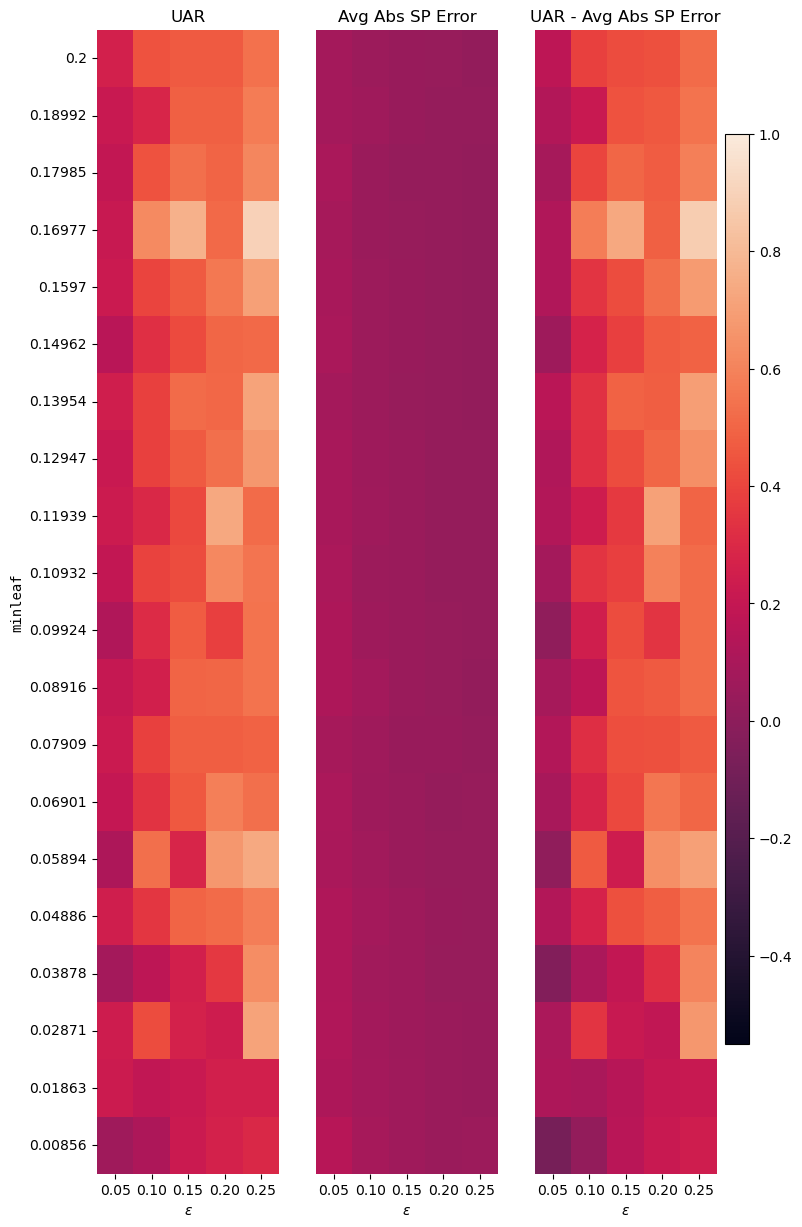

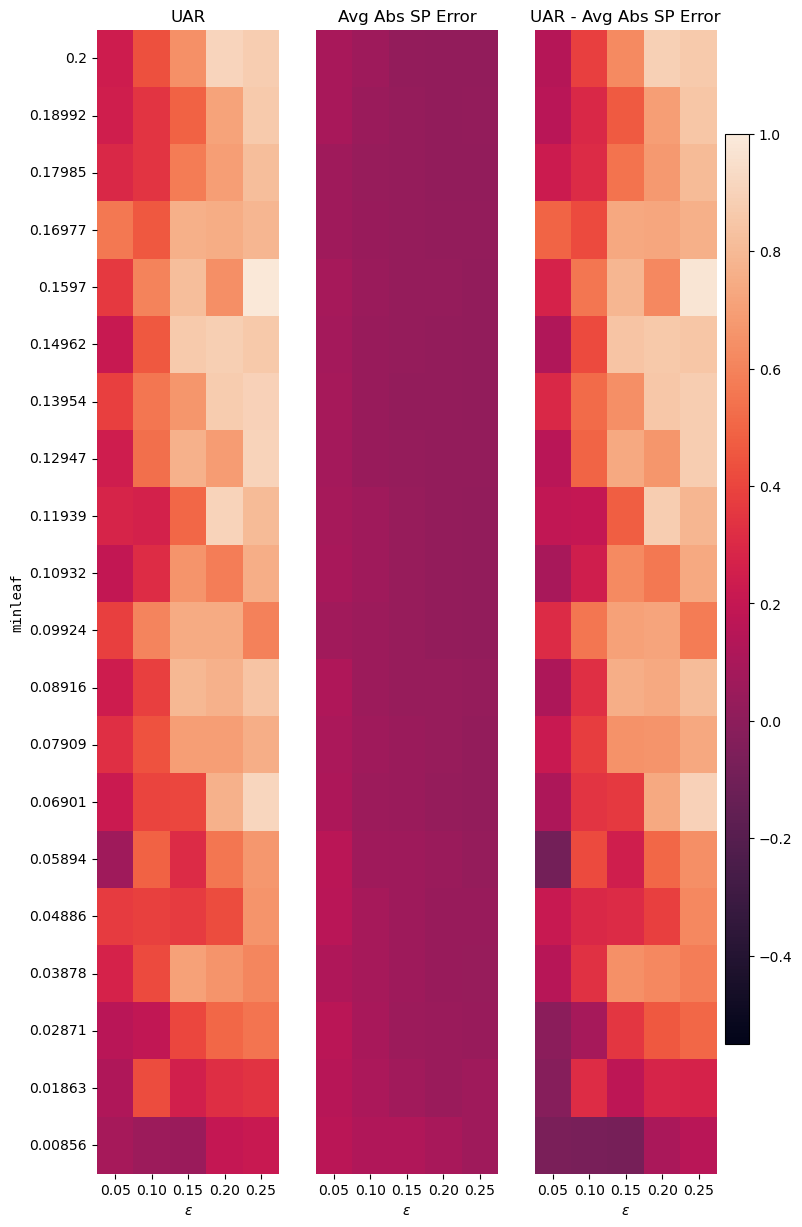

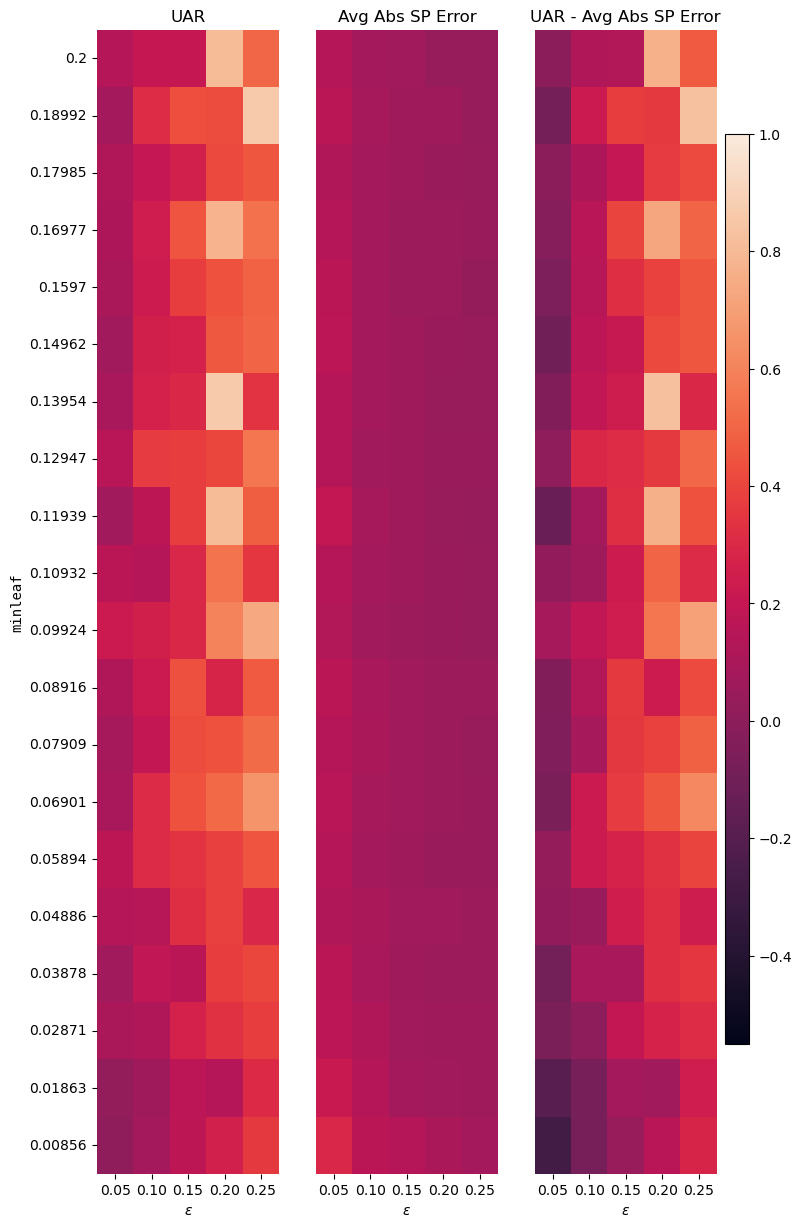

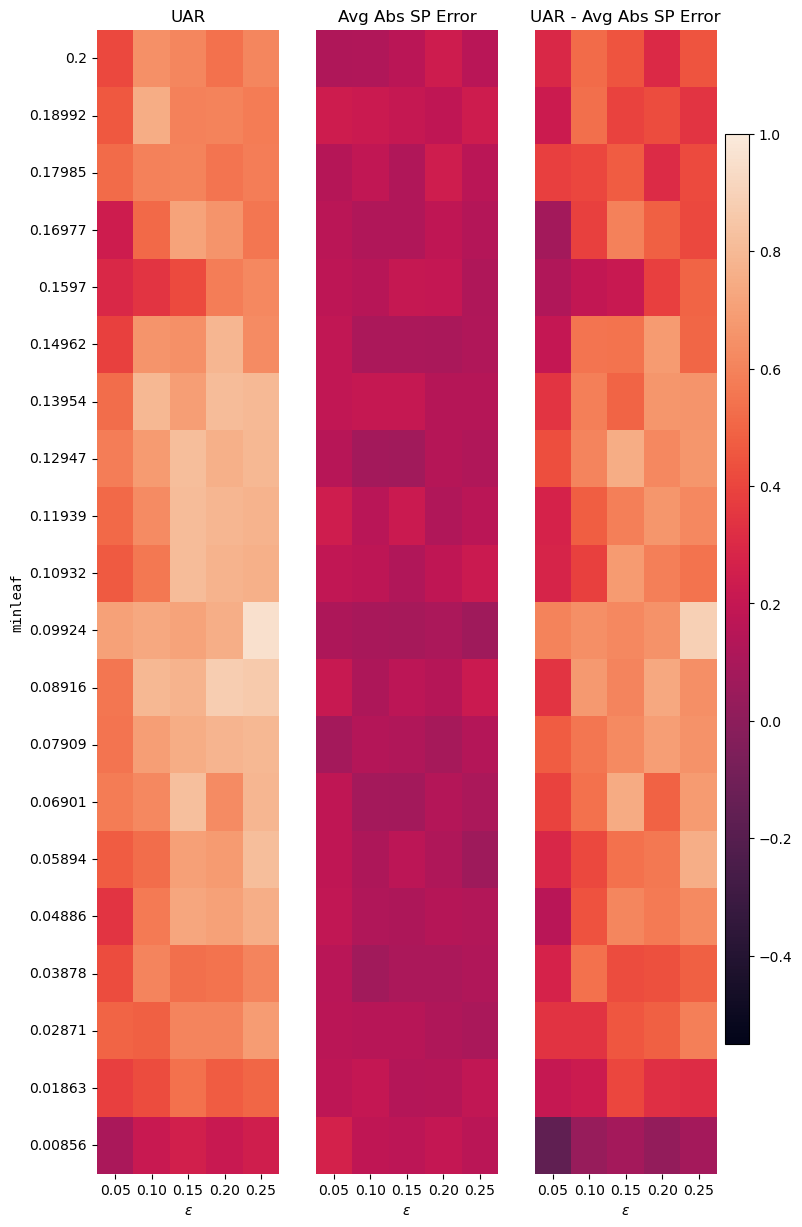

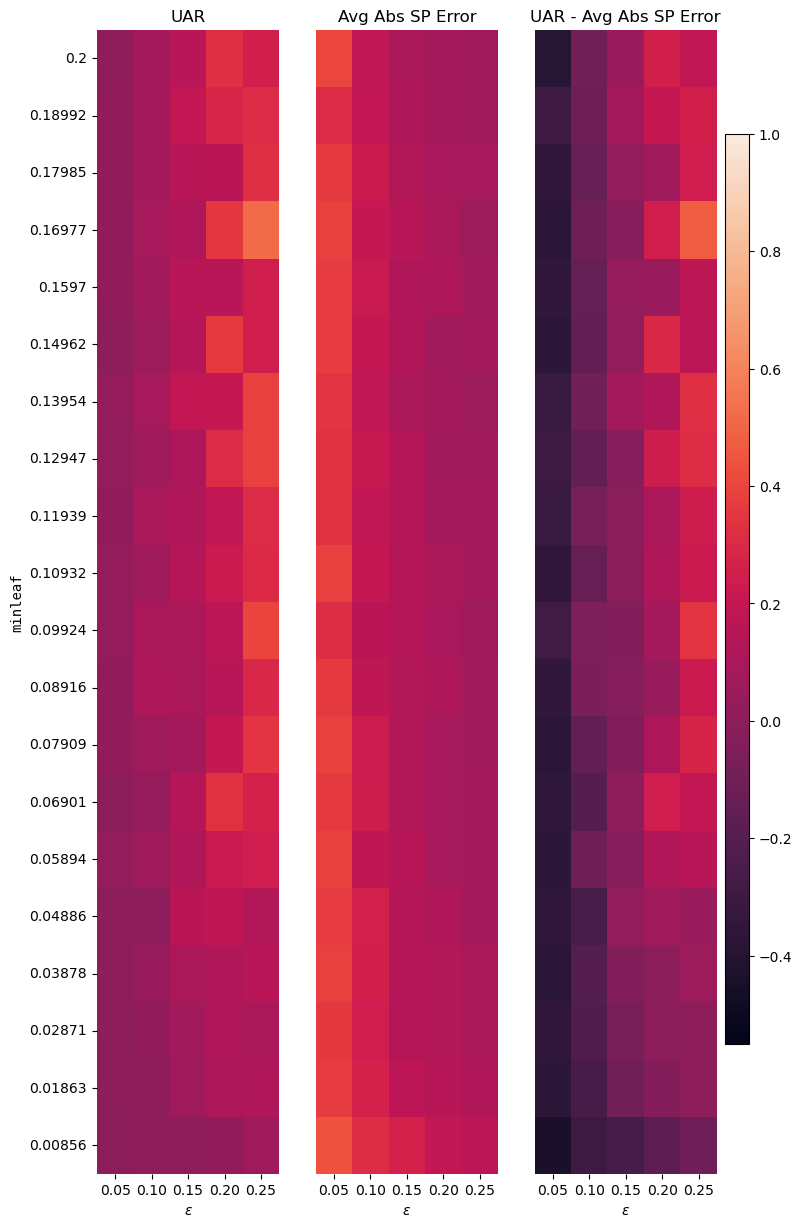

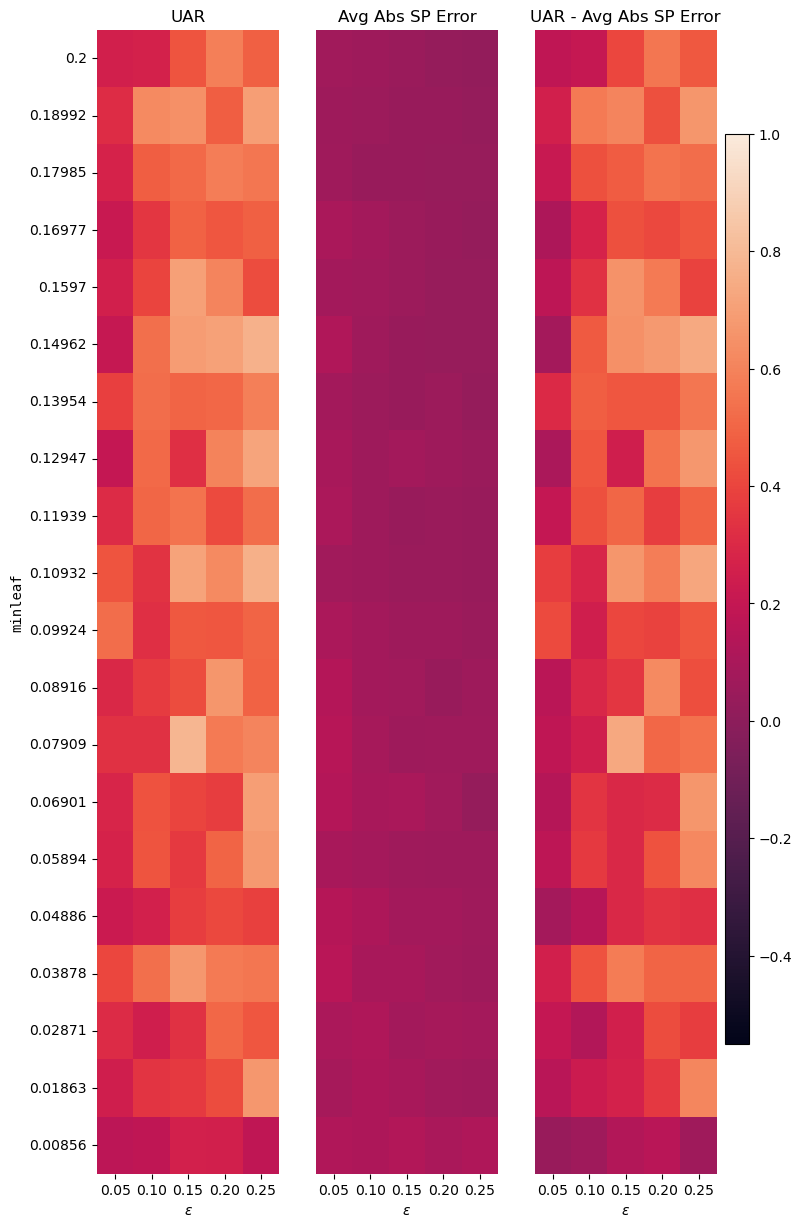

In [354]:
for e_sp_combi, t_sp_combi, name in zip(estimated_sps, tree_sps, ["race-compas", "sex-compas", "sex_race-compas", "race-adult", "sex-adult", "sex_race-adult"]):
    uars = np.zeros((80, 5))
    uars_errs = np.zeros((80, 5))
    errs = []
    uncerts = []
    print(f"plots for {name}")
    for i, (e_minleaf, t_minleaf) in enumerate(zip(e_sp_combi, t_sp_combi)):
        # define mean abs err for every epsilon
        errs.append(np.mean(np.abs(e_minleaf.T - t_minleaf.T), axis=1))
        
        # define err uncertainty for every epsilon
        uncerts.append(np.std(np.abs(e_minleaf.T - t_minleaf.T), axis=1) / np.sqrt(50))
        
        for j, (e_run, t_run) in enumerate(zip(e_minleaf.T, t_minleaf.T)):
            # define unweighted average recall for every epsilon
            bin_e_sp = [f'{floor(e * 10) / 10.0}' for e in e_run]
            bin_t_sp = [f'{floor(t * 10) / 10.0}' for t in t_run]

            labels = sorted(list(set(np.unique(bin_t_sp)) | set(np.unique(bin_e_sp))))
            cm = confusion_matrix(bin_t_sp, bin_e_sp, labels=labels)
            
            uar = sum([(cm[idx, idx] / np.sum(cm[idx])) / len(labels) for idx, label in enumerate(labels) if np.sum(cm[idx]) > 0])
            uars[i, j] = uar
            uars_errs[i, j] = uar - np.array(errs)[i, j]
            
    # Create the figure and define the grid
    fig = plt.figure(figsize=(8, 13))
    gs = GridSpec(1, 3, figure=fig, hspace=0.125)

    # First subplot
    ax1 = fig.add_subplot(gs[0])
    sns.heatmap(uars[::4], ax=ax1, annot=False, xticklabels=['0.05', '0.10', '0.15', '0.20', '0.25'],
                yticklabels=[round(minleaf, 5) for minleaf in minleafs[::4]], cbar=False, vmin=-0.55, vmax=1)
    hfont = {'fontname': 'monospace'}
    ax1.set_ylabel("minleaf", **hfont)
    ax1.set_xlabel("$\epsilon$")
    ax1.set_title("UAR")
    
    # Second subplot
    ax2 = fig.add_subplot(gs[1])
    sns.heatmap(errs[::4], ax=ax2, annot=False, xticklabels=['0.05', '0.10', '0.15', '0.20', '0.25'], 
                yticklabels=[], cbar=False, vmin=-0.55, vmax=1)
    ax2.set_xlabel("$\epsilon$")
    ax2.set_title("Avg Abs SP Error")
    
    # Third subplot
    ax3 = fig.add_subplot(gs[2])
    sns.heatmap(uars_errs[::4], ax=ax3, annot=False, xticklabels=['0.05', '0.10', '0.15', '0.20', '0.25'],
                yticklabels=[], cbar=False, vmin=-0.55, vmax=1)
    ax3.set_xlabel("$\epsilon$")
    ax3.set_title("UAR - Avg Abs SP Error")
    
    # Create a shared colorbar
    cbar_ax = fig.add_axes([0.91, 0.15, 0.03, 0.7])  # [left, bottom, width, height]
    cbar = fig.colorbar(ax1.collections[0], cax=cbar_ax)
    # adjust margins for savefig
    plt.subplots_adjust(top=0.93, bottom=0.05)
    plt.savefig(f"{name}-hyperparameter-grid.png", dpi=400)


In [116]:
uncerts = []
errs = []
eighty_percents = []
estimated_sps = []
tree_sps = []

for sens_attr in ["race", "sex", "sex_race"]:
    for dataset in ["compas", "adult"]:
        with open(f"resultsrsq1withinvalids/{dataset}-{sens_attr}-uncerts", 'rb') as f:
            uncerts.append(np.load(f))
                
        with open(f"resultsrsq1withinvalids/{dataset}-{sens_attr}-errs", 'rb') as f:
            errs.append(np.load(f))
            
        with open(f"resultsrsq1withinvalids/{dataset}-{sens_attr}-eighty_percents", 'rb') as f:
            eighty_percents.append(np.load(f))
        
        with open(f"resultsrsq1withinvalids/{dataset}-{sens_attr}-estimated_sps", 'rb') as f:
            estimated_sps.append(np.load(f))
            
        with open(f"resultsrsq1withinvalids/{dataset}-{sens_attr}-tree_sps", 'rb') as f:
            tree_sps.append(np.load(f))
            
with open("compas-label-parities", 'rb') as f:
    compas_lps = np.load(f)
    
with open("adult-label-parities", 'rb') as f:
    adult_lps = np.load(f)
            

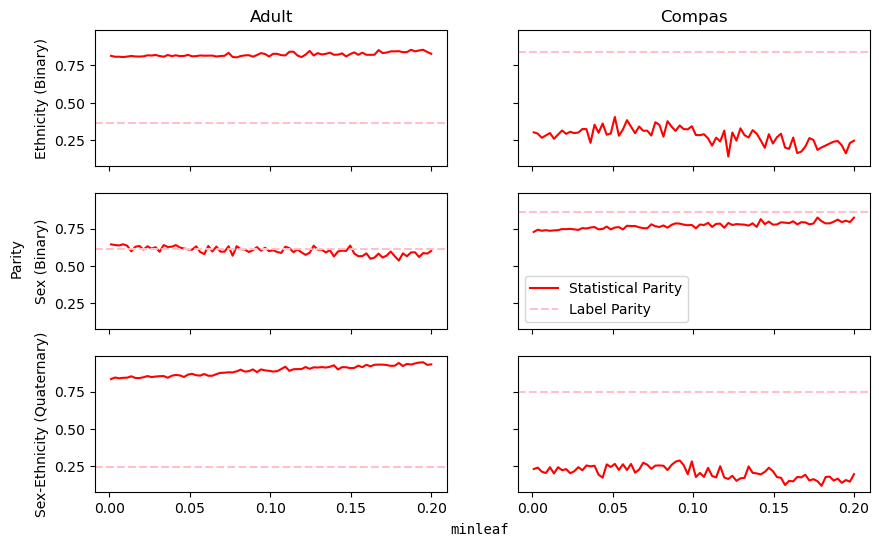

In [132]:
# Create a figure with 6 subplots in a 3x2 grid
fig, axs = plt.subplots(3, 2, sharex=True, sharey=True, figsize=(10, 6))
minleafs = np.linspace(0.2, 0.001, 80)

lps = np.append(adult_lps, compas_lps)
for ax, t_sp, lp in zip([0, 2, 4, 1, 3, 5], tree_sps, lps):
    axs.flat[ax].plot(minleafs, np.mean(t_sp, axis=1), color='red', label="Statistical Parity")
    axs.flat[ax].axhline(lp, linestyle="--", color='pink', label="Label Parity", )
    
axs.flat[0].set_title("Adult")
axs.flat[1].set_title("Compas")
axs.flat[0].set_ylabel("Ethnicity (Binary)")
axs.flat[2].set_ylabel("Sex (Binary)")
axs.flat[4].set_ylabel("Sex-Ethnicity (Quaternary)")
axs.flat[3].legend()
    
# Set common labels for x and y axes
hfont = {'fontname':'monospace'}
fig.text(0.51, 0.04, 'minleaf', **hfont, ha='center')
fig.text(0.04, 0.5, 'Parity', va='center', rotation='vertical')

# Show the plot
plt.savefig("rsq2-intersectional-invalids.png", dpi=500)
plt.show()

In [228]:
laplace_errs, exp_errs, gaussian_errs, laplace_invalid_ratio, gaussian_invalid_ratio, tree_sps, estimated_sps = [], [], [], [], [], [], []

with open("preliminaryresults/adult-race-laplace_errs-prelim", 'rb') as f:
    laplace_errs = np.load(f)
    
with open("preliminaryresults/adult-race-exp_errs-prelim", 'rb') as f:
    exp_errs = np.load(f)
    
with open("preliminaryresults/adult-race-gaussian_errs-prelim", 'rb') as f:
    gaussian_errs = np.load(f)
    
with open("preliminaryresults/adult-race-laplace_inv_ratio-prelim", 'rb') as f:
    laplace_invalid_ratio = np.load(f)
    
with open("preliminaryresults/adult-race-gaussian_inv_ratio-prelim", 'rb') as f:
    gaussian_invalid_ratio = np.load(f)
    
    
with open("preliminaryresults/adult-race-tree_sps-prelim", 'rb') as f:
    tree_sps = np.load(f)
    
with open("preliminaryresults/adult-race-estimated_sps-prelim", 'rb') as f:
    estimated_sps = np.load(f)

In [229]:
epsilons = np.array([0.5, 0.55, 0.6, 0.65, 0.7, 0.75])
laplace_errs = np.insert(laplace_errs, 0, 0.023195737847414053)
exp_errs = np.insert(exp_errs, 0, 0.3434978204048131)
laplace_invalid_ratio = np.insert(laplace_invalid_ratio, 0, 0.0025)
gaussian_errs = np.insert(gaussian_errs, 0, -1.0)
gaussian_invalid_ratio = np.insert(gaussian_invalid_ratio, 0, -1.0)

prelim_rsq0 = pd.DataFrame(np.array([epsilons.T, laplace_errs.T, exp_errs.T, gaussian_errs.T, laplace_invalid_ratio.T, gaussian_invalid_ratio.T]).T, columns=["\epsilon", "Laplacian", "Exponential", "Gaussian", "Laplacian Invalid Ratio", "Gaussian Invalid Ratio"])
prelim_rsq0

,\epsilon,Laplacian,Exponential,Gaussian,Laplacian Invalid Ratio,Gaussian Invalid Ratio
0,0.50,0.023196,0.343498,-1.000000,0.0025,-1.000
1,0.55,0.020648,0.302891,0.324838,0.0000,0.330
2,0.60,0.018722,0.257799,0.289161,0.0000,0.305
3,0.65,0.013293,0.275658,0.269608,0.0000,0.230
4,0.70,0.010260,0.308306,0.276763,0.0000,0.250
5,0.75,0.013534,0.324442,0.265724,0.0000,0.260


In [230]:
print(prelim_rsq0.to_latex(index=False))

\begin{tabular}{rrrrrr}
\toprule
 \textbackslash epsilon &  Laplacian &  Exponential &  Gaussian &  Laplacian Invalid Ratio &  Gaussian Invalid Ratio \\
\midrule
     0.50 &   0.023196 &     0.343498 & -1.000000 &                   0.0025 &                  -1.000 \\
     0.55 &   0.020648 &     0.302891 &  0.324838 &                   0.0000 &                   0.330 \\
     0.60 &   0.018722 &     0.257799 &  0.289161 &                   0.0000 &                   0.305 \\
     0.65 &   0.013293 &     0.275658 &  0.269608 &                   0.0000 &                   0.230 \\
     0.70 &   0.010260 &     0.308306 &  0.276763 &                   0.0000 &                   0.250 \\
     0.75 &   0.013534 &     0.324442 &  0.265724 &                   0.0000 &                   0.260 \\
\bottomrule
\end{tabular}



/var/folders/d6/97vsb8ys2xsd5zzsdl4ndt6c0000gn/T/ipykernel_24212/4145512405.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(prelim_rsq0.to_latex(index=False))


In [234]:
errs = []
for e_minleaf, t_minleaf in zip(tree_sps, estimated_sps):
    # define mean abs err for every epsilon
    errs.append(np.mean(np.abs(e_minleaf.T - t_minleaf.T), axis=1))

print(errs)

[0.64527416 0.64527416 0.64527416 0.64527416 0.64527416]
[0.688228 0.688228 0.688228 0.688228 0.688228]
[array([0.07109494, 0.03245486, 0.02354119, 0.01866292, 0.01194238]), array([0.04860795, 0.02815108, 0.01877334, 0.01493656, 0.01279705])]
